## FULL WORKING BACKPROP ANIMATION (Single Notebook)

### Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import PillowWriter


### Toy Datasets

In [2]:
# Simple 1D regression
x = np.linspace(-1, 1, 20)
y = 2 * x + 0.5   # true function


### Model + training

In [3]:
# Parameters
w1, b1 = 0.5, 0.0
w2, b2 = 0.5, 0.0
lr = 0.3
epochs = 20

history = []

def relu(z):
    return np.maximum(0, z)

def drelu(z):
    return (z > 0).astype(float)

for epoch in range(epochs):
    # Forward
    z1 = w1 * x + b1
    a1 = relu(z1)
    y_hat = w2 * a1 + b2

    loss = np.mean((y_hat - y) ** 2)

    # Backward
    dL_dy = 2 * (y_hat - y) / len(x)

    dL_dw2 = np.sum(dL_dy * a1)
    dL_db2 = np.sum(dL_dy)

    da1 = dL_dy * w2
    dz1 = da1 * drelu(z1)

    dL_dw1 = np.sum(dz1 * x)
    dL_db1 = np.sum(dz1)

    # Save state
    history.append({
        "w1": w1, "b1": b1,
        "w2": w2, "b2": b2,
        "loss": loss,
        "a1": a1.mean(),
        "yhat": y_hat.mean()
    })

    # Update
    w2 -= lr * dL_dw2
    b2 -= lr * dL_db2
    w1 -= lr * dL_dw1
    b1 -= lr * dL_db1


### Backpropagation Animation

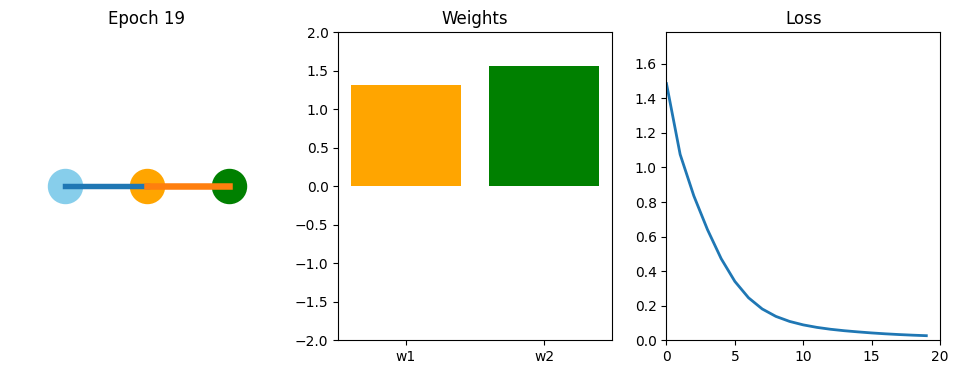

In [4]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

ax_net, ax_vals, ax_loss = axes

# Network diagram
ax_net.set_title("Neural Network")
ax_net.set_xlim(0, 10)
ax_net.set_ylim(0, 10)
ax_net.axis("off")

# Nodes
input_node = ax_net.scatter(2, 5, s=600, c="skyblue")
hidden_node = ax_net.scatter(5, 5, s=600, c="orange")
output_node = ax_net.scatter(8, 5, s=600, c="green")

# Edges
line1, = ax_net.plot([2, 5], [5, 5], lw=3)
line2, = ax_net.plot([5, 8], [5, 5], lw=3)

# Bars
bars = ax_vals.bar(["w1", "w2"], [0, 0], color=["orange", "green"])
ax_vals.set_ylim(-2, 2)
ax_vals.set_title("Weights")

# Loss plot
loss_line, = ax_loss.plot([], [], lw=2)
ax_loss.set_xlim(0, epochs)
ax_loss.set_ylim(0, max(h["loss"] for h in history) * 1.2)
ax_loss.set_title("Loss")

losses = []

writer = PillowWriter(fps=2)

with writer.saving(fig, "gifs/backpropagation.gif", dpi=80):
    for t, h in enumerate(history):
        # Update weights visualization
        bars[0].set_height(h["w1"])
        bars[1].set_height(h["w2"])

        # Edge thickness shows gradient effect
        line1.set_linewidth(abs(h["w1"]) * 3)
        line2.set_linewidth(abs(h["w2"]) * 3)

        # Update loss curve
        losses.append(h["loss"])
        loss_line.set_data(range(len(losses)), losses)

        ax_loss.set_xlim(0, epochs)

        ax_net.set_title(f"Epoch {t}")

        writer.grab_frame()

plt.show()


In [5]:
from matplotlib.animation import PillowWriter

writer = PillowWriter(fps=2)

with writer.saving(fig, "gifs/backpropagation.gif", dpi=100):
    for t, h in enumerate(history):
        bars[0].set_height(h["w1"])
        bars[1].set_height(h["w2"])

        line1.set_linewidth(abs(h["w1"]) * 3)
        line2.set_linewidth(abs(h["w2"]) * 3)

        losses.append(h["loss"])
        loss_line.set_data(range(len(losses)), losses)

        ax_loss.set_xlim(0, len(history))
        ax_net.set_title(f"Epoch {t}")

        writer.grab_frame()
